# Movie Preferences in Conflicts

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In this section, we provide an overview of the approach with which we face the following research question:   
`How do movie genre preferences differ between countries in conflict or those experiencing similar global events?`   
The first step of our analysis is to import the data:

In [2]:
data = pd.read_table("data/movies_with_summaries.csv", sep=",")
data.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"['Thriller', 'Science Fiction', 'Horror', 'Adv...","['Action,Horror,Sci-Fi']",4.9,58872,14010832.0,98.0,['English Language'],['United States of America'],"Set in the second half of the 22nd century, th..."
1,261236,tt0083949,A Woman in Flames,Die flambierte Frau,1983,1983,['Drama'],['Drama'],5.9,648,NaN,106.0,['German Language'],['Germany'],"Eva, an upper class housewife, becomes frustra..."
2,171005,tt0097499,Henry V,Henry V,1989-11-08,1989,"['Costume drama', 'War film', 'Epic', 'Period ...","['Biography,Drama,History']",7.5,32088,10161099.0,137.0,['English Language'],['United Kingdom'],{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
3,77856,tt0058331,Mary Poppins,Mary Poppins,1964-08-27,1964,"['ChildrensFamily', 'Musical', 'Fantasy', 'Com...","['Comedy,Family,Fantasy']",7.8,189202,102272727.0,139.0,['English Language'],['United States of America'],The film opens with Mary Poppins perched in a...
4,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],['Drama'],7.7,24,NaN,108.0,['German Language'],['German Democratic Republic'],"Otto Brosowski, a communist miner, writes to t..."


In [3]:
data['Genres'] = data['Genres'].fillna("[]")
data['Genres'] = data['Genres'].str.strip("[]").str.replace("'", "").str.split(", ")

data['Genres_IMDb'] = data['Genres_IMDb'].fillna("[]")
data['Genres_IMDb'] = data['Genres_IMDb'].str.strip("[]").str.replace("'", "").str.split(",")

data['Countries'] = data['Countries'].fillna("[]")
data['Countries'] = data['Countries'].str.strip("[]").str.replace("'", "").str.split(", ")

data.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Horror, Sci-Fi]",4.9,58872,14010832.0,98.0,['English Language'],[United States of America],"Set in the second half of the 22nd century, th..."
1,261236,tt0083949,A Woman in Flames,Die flambierte Frau,1983,1983,[Drama],[Drama],5.9,648,NaN,106.0,['German Language'],[Germany],"Eva, an upper class housewife, becomes frustra..."
2,171005,tt0097499,Henry V,Henry V,1989-11-08,1989,"[Costume drama, War film, Epic, Period piece, ...","[Biography, Drama, History]",7.5,32088,10161099.0,137.0,['English Language'],[United Kingdom],{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
3,77856,tt0058331,Mary Poppins,Mary Poppins,1964-08-27,1964,"[ChildrensFamily, Musical, Fantasy, Comedy, Dr...","[Comedy, Family, Fantasy]",7.8,189202,102272727.0,139.0,['English Language'],[United States of America],The film opens with Mary Poppins perched in a...
4,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],[Drama],7.7,24,NaN,108.0,['German Language'],[German Democratic Republic],"Otto Brosowski, a communist miner, writes to t..."


Our data has two columns related to genres, one coming from the CMU dataset, and one coming from the IMDb dataset.   

In [4]:
all_genres = data['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count = Counter([genre.strip() for genres in all_genres for genre in genres])
genres_list = genres_count.keys()
len(genres_list)

352

In [5]:
genres_list

dict_keys(['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western', 'Drama', 'Costume drama', 'War film', 'Epic', 'Period piece', 'Film adaptation', 'ChildrensFamily', 'Musical', 'Fantasy', 'Comedy', 'Family Film', 'Childrens Fantasy', '', 'Romantic comedy', 'Romance Film', 'Indie', 'Crime Fiction', 'Coming of age', 'World cinema', 'Romantic drama', 'Bollywood', 'Black comedy', 'ActionAdventure', 'Cult', 'Adventure Comedy', 'Slapstick', 'Sports', 'Family Drama', 'Comedydrama', 'Biographical film', 'Historical fiction', 'Blackandwhite', 'Biopic feature', 'Culture  Society', 'Biography', 'Documentary', 'Christmas movie', 'Television movie', 'Action Comedy', 'Blaxploitation', 'Martial Arts Film', 'Erotica', 'SciFi Horror', 'Psychological thriller', 'Satire', 'Western', 'Softcore Porn', 'Sexploitation', 'Mystery', 'Crime Thriller', 'Action Thrillers', 'Suspense', 'Musical Drama', 'Film noir', 'Experimental film', 'Surrealism', 'Tragicomedy', 'Avantga

In [6]:
all_genres_imdb = data['Genres_IMDb'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_imdb = Counter([genre.strip() for genres in all_genres_imdb for genre in genres])
genres_list_imdb = genres_count_imdb.keys()
len(genres_list_imdb)

27

It is easy to see that both columns have their advantages and disadvantages: the `Genres` column, coming from the CMU dataset, has several more classes compared to the `Genres_IMDb` column, derived from the IMDb dataset (356 vs 27), and this strong difference can have both positive and negative effects based on the task at hand.   
Due to the very high amount of different classes, several of them are considerably similar to one-another (an example can be given by 'Crime Thriller', 'Crime Drama', 'Crime Comedy', 'Law  Crime', 'Crime', 'Master Criminal Films',... - here all the movies could be put under the common tag 'Crime'), and this could lead to some problems in the use of some models.   
On the other hand, in some more targeted analysis - such as the one we face in this section - the few classes provided by the IMDb dataset don't allow any conclusion on very specific subtopics, which is why in this section the column on which we will focus our analysis is the column `Genres`.

## Genres Distribution by Year

A first tool of our analysis is a chronological filtering, using the `Release_Date` and `Year` columns.   
We selected two subsets of movies, the ones produced in the 1960s and those produced in the XXI century, and we look at the differences in movie genres between these two periods of time.

In [7]:
movies_60s = data[(data['Year'] < 1970) & (data['Year'] >= 1960)]
movies_2000s = data[data['Year'] >= 2000]
movies_60s.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
3,77856,tt0058331,Mary Poppins,Mary Poppins,1964-08-27,1964,"[ChildrensFamily, Musical, Fantasy, Comedy, Dr...","[Comedy, Family, Fantasy]",7.8,189202,102272727.0,139.0,['English Language'],[United States of America],The film opens with Mary Poppins perched in a...
4,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],[Drama],7.7,24,NaN,108.0,['German Language'],[German Democratic Republic],"Otto Brosowski, a communist miner, writes to t..."
28,5664529,tt0063787,Vixen!,Vixen!,1968,1968,"[Softcore Porn, Sexploitation]",[Drama],5.6,3185,NaN,70.0,['English Language'],[United States of America],"In the heart of the Canadian wilderness, sultr..."
30,12788657,tt0062755,The Boston Strangler,The Boston Strangler,1968,1968,"[Crime Fiction, Mystery, Thriller, Drama, Crim...","[Crime, Drama, Mystery]",7.0,11083,17810894.0,116.0,['English Language'],[United States of America],The first part of the film shows the police in...
41,7767613,tt0063642,Star!,Star!,1968-07-18,1968,"[Biography, Musical, Drama, Biopic feature, Bi...","[Biography, Comedy, Drama]",6.4,2304,4000000.0,176.0,['English Language'],[United States of America],"The film opens in 1940, with Lawrence in a scr..."


In [8]:
all_genres_60s = movies_60s['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_60s = Counter([genre.strip() for genres in all_genres_60s for genre in genres])
genres_count_60s_reduced = dict(genres_count_60s.most_common(30))
genres_count_60s_reduced

{'Drama': 943,
 'Comedy': 515,
 'Romance Film': 317,
 'World cinema': 257,
 'Action': 246,
 'Thriller': 221,
 'ActionAdventure': 217,
 'Adventure': 210,
 'Crime Fiction': 187,
 'Musical': 170,
 'Family Film': 166,
 'Blackandwhite': 161,
 'Horror': 154,
 'Western': 132,
 'Science Fiction': 129,
 'War film': 128,
 'Animation': 128,
 'Romantic drama': 118,
 'Short Film': 117,
 'Romantic comedy': 113,
 'Film adaptation': 112,
 'Mystery': 81,
 'Japanese Movies': 80,
 'Fantasy': 77,
 'Bollywood': 66,
 'Indie': 63,
 'Crime Thriller': 61,
 'Spy': 61,
 'Parody': 57,
 'Satire': 56}

In [9]:
all_genres_2000s = movies_2000s['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_2000s = Counter([genre.strip() for genres in all_genres_2000s for genre in genres])
genres_count_2000s_reduced = dict(genres_count_2000s.most_common(30))
genres_count_2000s_reduced

{'Drama': 5987,
 'Comedy': 3103,
 'Thriller': 2636,
 'Romance Film': 2323,
 'World cinema': 2059,
 'Action': 2000,
 'Indie': 1420,
 'Horror': 1407,
 'Crime Fiction': 1306,
 'ActionAdventure': 1200,
 'Adventure': 970,
 'Romantic drama': 954,
 'Family Film': 901,
 'Romantic comedy': 797,
 'Science Fiction': 772,
 'Fantasy': 772,
 'Mystery': 763,
 'Crime Thriller': 652,
 'Musical': 617,
 'Period piece': 545,
 'Animation': 536,
 'Psychological thriller': 487,
 'Comedydrama': 473,
 'Documentary': 431,
 'Comedy film': 428,
 'Film adaptation': 410,
 'Bollywood': 385,
 'Teen': 373,
 'LGBT': 371,
 'Television movie': 350}

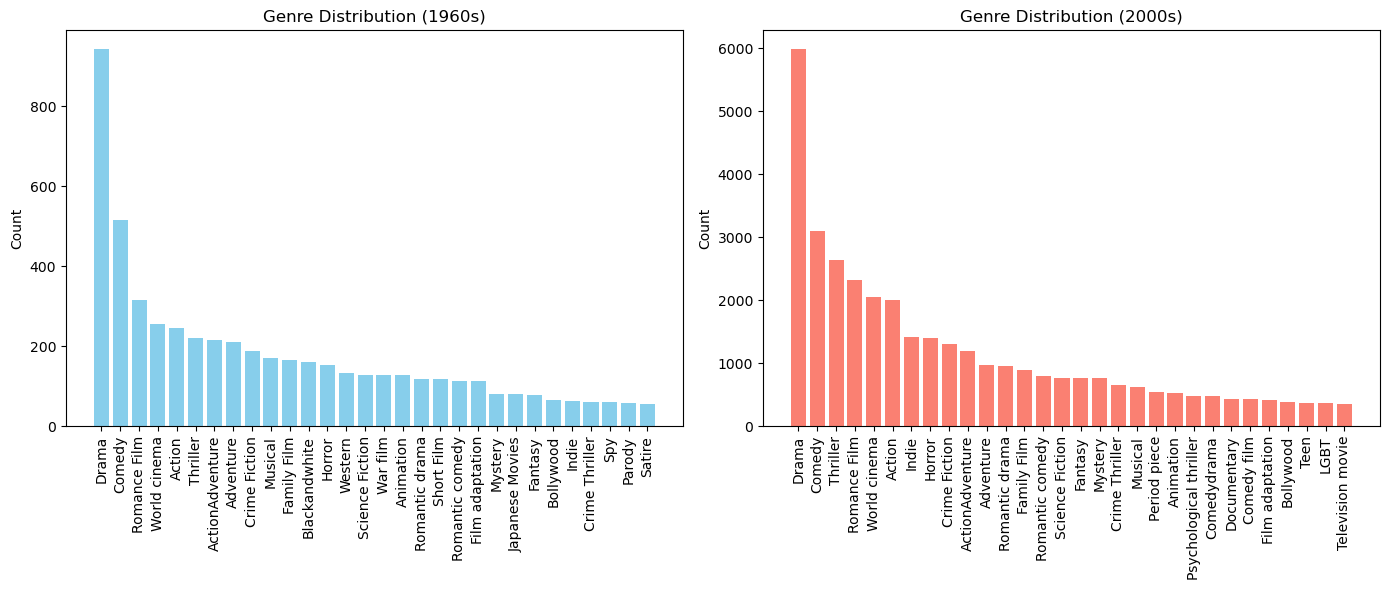

In [10]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 1960s
axes[0].bar(genres_count_60s_reduced.keys(), genres_count_60s_reduced.values(), color='skyblue')
axes[0].set_title('Genre Distribution (1960s)')
axes[0].set_xticklabels(genres_count_60s_reduced.keys(), rotation=90)
axes[0].set_ylabel('Count')

# Plot for 2000s
axes[1].bar(genres_count_2000s_reduced.keys(), genres_count_2000s_reduced.values(), color='salmon')
axes[1].set_title('Genre Distribution (2000s)')
axes[1].set_xticklabels(genres_count_2000s_reduced.keys(), rotation=90)
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

By looking at the most common genres in both time periods, it is easy to see some significant differences between the two histogram plots:
- The overall number of produced movies has increased a lot iver time, so much that the least common movie genre in the 2000s plot (Film Adaptation, with 466 movies) has more elements than the third most common genre in the 60s (Romance Film, with 448 movies).   
- Some movie genres have disappeared from the most common ones (such as Black and White movies or Westerns), leaving space to others touching themes more relevant to the common era (such as 'LGBT' and 'Sports')

## Genres Distribution by Country

A second approach to our analysis is driven by the elements in the column `Countries`: are the distributions between genres different between the various countries where they are produced? We will do a quick analysis of USA and Russia, two countries which historically are confronted in several contexts.

In [13]:
us_movies = data[data['Countries'].apply(lambda x: 'United States of America' in x if isinstance(x, list) else False)]
russia_movies = data[data['Countries'].apply(lambda x: 'Russia' in x or 'Soviet Union' in x if isinstance(x, list) else False)]
russia_movies.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
619,19972307,tt0476695,The Sovereign's Servant,Sluga Gosudarev,2007-02-20,2007,"[History, Action, Adventure, War film]","[Action, Adventure, History]",5.8,1484,NaN,131.0,"['French Language', 'Polish Language', 'Russia...",[Russia],Tha action takes place at the time of the Swed...
703,17243300,tt0073927,"Hello, I'm Your Aunt!","Zdravstvuyte, ya vasha tyotya!",1975,1975,"[Musical, Comedy]",[Comedy],7.4,1871,NaN,98.0,['Russian Language'],[Soviet Union],The action takes place at the beginning of 20t...
1167,30665531,tt0200267,The Rifleman of the Voroshilov Regiment,Voroshilovskiy strelok,1999,1999,"[Crime Fiction, Drama]","[Crime, Drama]",7.4,5087,NaN,100.0,['Russian Language'],[Russia],World War II veteran Ivan Afonin lives with hi...
1263,26978561,tt0403645,Burnt by the Sun 2,Utomlennye solntsem 2,2010-04-17,2010,"[Drama, World cinema]","[Drama, History, War]",4.3,4529,8266778.0,180.0,['Russian Language'],"[France, Russia, Germany]",The film begins in June 1941. Five years have...
1753,26284851,tt1740033,The Book of Masters,The Book of Masters,2009,2009,[Fantasy],[Adventure],6.4,15,NaN,100.0,['Russian Language'],[Russia],"A beautiful and kind girl, daughter of Baba Ya..."


In [14]:
all_genres_us = us_movies['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_us = Counter([genre.strip() for genres in all_genres_us for genre in genres])
genres_count_us_reduced = dict(genres_count_us.most_common(30))
genres_count_us_reduced

{'Drama': 7883,
 'Comedy': 5525,
 'Thriller': 3669,
 'Action': 3111,
 'Romance Film': 3076,
 'Crime Fiction': 2407,
 'ActionAdventure': 2326,
 'Indie': 2125,
 'Blackandwhite': 2095,
 'Adventure': 2093,
 'Horror': 1998,
 'Family Film': 1905,
 'Science Fiction': 1386,
 'Romantic comedy': 1347,
 'Mystery': 1296,
 'Fantasy': 1145,
 'Crime Thriller': 1122,
 'Animation': 1057,
 'Romantic drama': 1050,
 'Musical': 930,
 'Film adaptation': 921,
 'Period piece': 830,
 'Comedydrama': 778,
 'Western': 768,
 'Psychological thriller': 764,
 'Short Film': 746,
 'War film': 711,
 'Teen': 636,
 'ChildrensFamily': 595,
 'Black comedy': 515}

In [15]:
all_genres_russia = russia_movies['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_russia = Counter([genre.strip() for genres in all_genres_russia for genre in genres])
genres_count_russia_reduced = dict(genres_count_russia.most_common(30))
genres_count_russia_reduced

{'Drama': 94,
 'World cinema': 55,
 'Comedy': 28,
 'Romance Film': 25,
 'War film': 24,
 'Action': 23,
 'Fantasy': 20,
 'Thriller': 17,
 'Adventure': 15,
 'Crime Fiction': 15,
 'Science Fiction': 13,
 'History': 12,
 'Animation': 11,
 'Romantic drama': 9,
 'ActionAdventure': 8,
 'Art film': 7,
 'Family Film': 7,
 'Horror': 7,
 'Biographical film': 6,
 'Period piece': 6,
 'Blackandwhite': 5,
 'Short Film': 5,
 'Political drama': 5,
 'Japanese Movies': 5,
 'Mystery': 5,
 'Silent film': 4,
 'Supernatural': 4,
 'Indie': 4,
 'Gangster Film': 4,
 'Musical': 3}

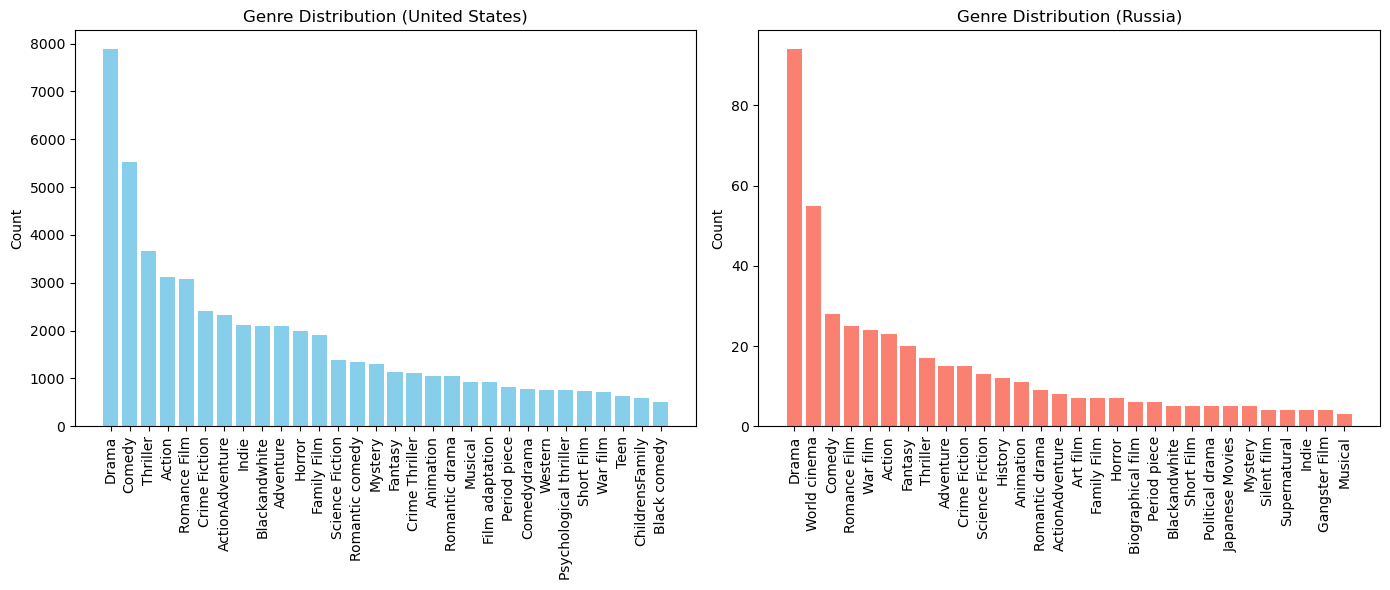

In [16]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for USA
axes[0].bar(genres_count_us_reduced.keys(), genres_count_us_reduced.values(), color='skyblue')
axes[0].set_title('Genre Distribution (United States)')
axes[0].set_xticklabels(genres_count_us_reduced.keys(), rotation=90)
axes[0].set_ylabel('Count')

# Plot for Russia
axes[1].bar(genres_count_russia_reduced.keys(), genres_count_russia_reduced.values(), color='salmon')
axes[1].set_title('Genre Distribution (Russia)')
axes[1].set_xticklabels(genres_count_russia_reduced.keys(), rotation=90)
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Similarly to the chronological analysis from the previous section, the most common genres stay pretty much the same between various countries, but we can see some slight differences between the two countries in exam:
- War films are much more common in Russia rather than in the USA, being 5th in popularity in Russia and only 25th in the USA (this however is not necessarily a significant difference, as the total number of movies in the two datasets are in completely different scales)
- Some genres such as Family Film are fairly common in the USA, while they are almost at the bottom of the list in Russia
- Genres like Westerns and Japanese Movies are geographically restricted to their respective countries, effect which is reflected by the above histograms.

## Genres Distribution by Year and Country

An additional step would be to combine the two analyses, filtering the dataset by both `Country` and `Year`.   
In this section we check for significant differences between the pair of USA and Russia vs the rest of the world, in the time period of the 1960s.

In [18]:
cw_movies = data[
    ((data['Countries'].apply(lambda x: 'United States of America' in x if isinstance(x, list) else False)) | (data['Countries'].apply(lambda x: 'Russia' in x or 'Soviet Union' in x if isinstance(x, list) else False))) & 
    (data['Year'] >= 1960) & (data['Year'] < 1970)]
not_cw_movies = data[
    ((data['Countries'].apply(lambda x: 'United States of America' not in x if isinstance(x, list) else False)) & (data['Countries'].apply(lambda x: 'Russia' not in x and 'Soviet Union' not in x if isinstance(x, list) else False))) & 
    (data['Year'] >= 1960) & (data['Year'] < 1970)]
not_cw_movies.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
4,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],[Drama],7.7,24,NaN,108.0,['German Language'],[German Democratic Republic],"Otto Brosowski, a communist miner, writes to t..."
87,7696753,tt0057261,Lord of the Flies,Lord of the Flies,1963-08-13,1963,"[Drama, Adventure, Dystopia, Film adaptation]","[Adventure, Drama, Thriller]",6.9,20788,NaN,90.0,['English Language'],[United Kingdom],"A group of English schoolchildren, living in t..."
116,32345990,tt0058772,Ziddi,Ziddi,1964,1964,"[World cinema, Musical, Drama, Comedy, Romanti...","[Musical, Romance]",6.9,58,NaN,149.0,['Hindi Language'],[India],"On the lookout for employment, Ashok sees the..."
135,235331,tt0058888,Red Beard,Akahige,1965-04,1965,"[Japanese Movies, Art film, World cinema, Blac...",[Drama],8.3,21725,NaN,185.0,['Japanese Language'],[Japan],"The film takes place in Koishikawa, a district..."
139,1249014,tt0056291,Knife in the Water,Nóz w wodzie,1962-03-09,1962,"[Thriller, Marriage Drama, Drama, World cinema]","[Drama, Thriller]",7.4,23986,NaN,94.0,['Polish Language'],[Poland],Andrzej and Krystyna are driving to a lake t...


In [19]:
all_genres_cw = cw_movies['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_cw = Counter([genre.strip() for genres in all_genres_cw for genre in genres])
genres_count_cw_reduced = dict(genres_count_cw.most_common(30))
genres_count_cw_reduced

{'Drama': 479,
 'Comedy': 355,
 'Romance Film': 190,
 'Action': 158,
 'ActionAdventure': 141,
 'Adventure': 133,
 'Family Film': 119,
 'Thriller': 108,
 'Western': 108,
 'Crime Fiction': 99,
 'Romantic comedy': 96,
 'Musical': 89,
 'War film': 88,
 'Animation': 85,
 'Blackandwhite': 82,
 'Horror': 77,
 'Short Film': 76,
 'Film adaptation': 71,
 'Science Fiction': 69,
 'Indie': 52,
 'Mystery': 48,
 'Romantic drama': 46,
 'Fantasy': 39,
 'Parody': 38,
 'Crime Thriller': 36,
 'Spy': 33,
 'Comedydrama': 29,
 'Satire': 28,
 'Cult': 27,
 'Slapstick': 26}

In [20]:
all_genres_not_cw = not_cw_movies['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_not_cw = Counter([genre.strip() for genres in all_genres_not_cw for genre in genres])
genres_count_not_cw_reduced = dict(genres_count_not_cw.most_common(30))
genres_count_not_cw_reduced

{'Drama': 464,
 'World cinema': 240,
 'Comedy': 160,
 'Romance Film': 127,
 'Thriller': 113,
 'Action': 88,
 'Crime Fiction': 88,
 'Musical': 81,
 'Blackandwhite': 79,
 'Adventure': 77,
 'Horror': 77,
 'ActionAdventure': 76,
 'Romantic drama': 72,
 'Japanese Movies': 72,
 'Bollywood': 66,
 'Science Fiction': 60,
 'Family Film': 47,
 'Art film': 45,
 'Animation': 43,
 'Film adaptation': 41,
 'Short Film': 41,
 'War film': 40,
 'Fantasy': 38,
 'Mystery': 33,
 'Comedy film': 32,
 'Satire': 28,
 'Spy': 28,
 'Crime Thriller': 25,
 'Western': 24,
 'Spaghetti Western': 20}

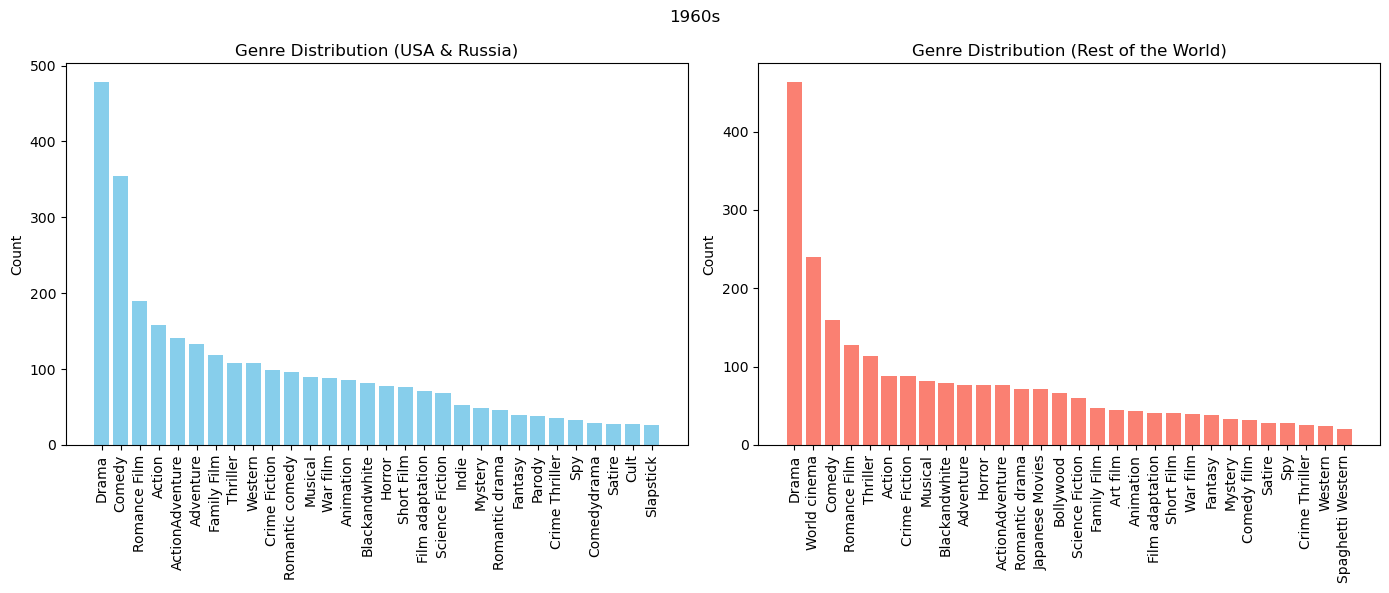

In [21]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for USA and Russia
axes[0].bar(genres_count_cw_reduced.keys(), genres_count_cw_reduced.values(), color='skyblue')
axes[0].set_title('Genre Distribution (USA & Russia)')
axes[0].set_xticklabels(genres_count_cw_reduced.keys(), rotation=90)
axes[0].set_ylabel('Count')

# Plot for Rest of the World
axes[1].bar(genres_count_not_cw_reduced.keys(), genres_count_not_cw_reduced.values(), color='salmon')
axes[1].set_title('Genre Distribution (Rest of the World)')
axes[1].set_xticklabels(genres_count_not_cw_reduced.keys(), rotation=90)
axes[1].set_ylabel('Count')

plt.suptitle("1960s")
plt.tight_layout()
plt.show()

Unfortunately, the two histograms show very few differences between one-another, with `War Film` and `Spy` movies having only a slightly higher position in the list despite being genres with possibly significant relevance to the historical period.   
It is moreover difficult to link this higher position solely to an historical correlation, as on the right histogram we see genres such as 'Japanese Movies' and 'Bollywood' which are inherently limited to the rest of the world.

## Single Genre Analysis

Single Movie genres are also a great driver of the analysis, as they can show some results which we can relate to historical events thanks to outside knowledge, as in the following example for the `Spy` genre:

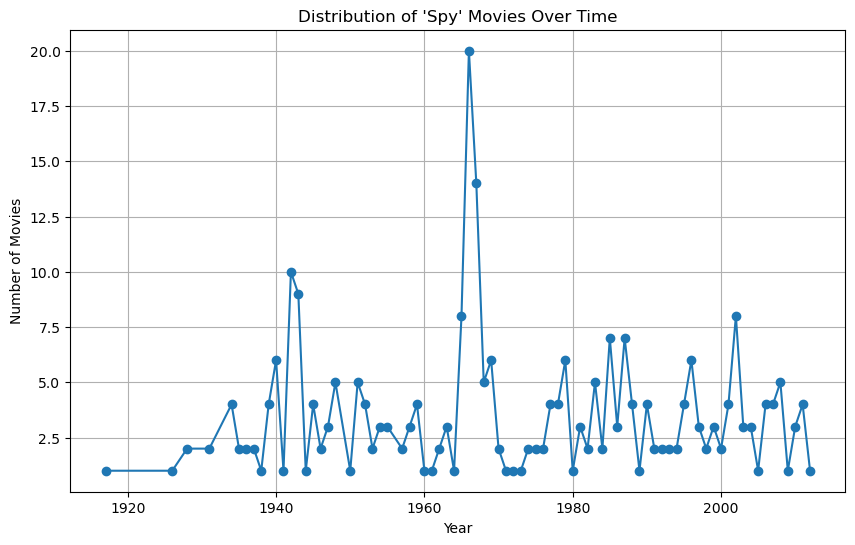

In [22]:
genre_to_plot = "Spy"
genre_movies = data[data['Genres'].apply(lambda x: genre_to_plot in x if isinstance(x, list) else False)]
movies_per_year = genre_movies.groupby('Year').size()
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.title(f"Distribution of '{genre_to_plot}' Movies Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [ ]:
sorted_years = dict(sorted(movies_per_year.items(), key=lambda item: item[1], reverse=True))
list(sorted_years.keys())[:10]

[1966, 1967, 1942, 1943, 1965, 2002, 1985, 1987, 1940, 1969]

The timeline for the genre shows two significant peaks near end of WWII (1942-1945) and middle of Cold War (1960s).   
We can explain this phenomena with a brief historical analysis: for example, we can say that in the period of WWII the topic of spies selling information to the enemies, as well as enemies stealing or intercepting information important for winning the war was a common fear among both Allies and Axis. This could have lead to the topic becoming part of the everyday life for a lot of people, up to the point of becoming part of the cinematic culture.

## Summary Analysis

A final approach to this analysis is to look at the difference in genre of movies produced in the same country but talking about other countries:
in this section we look at movies produced in the USA, and in particular to movies talking about the USA themselves and movies talking about Russia.   
This analysis is made possible by the column `summary`, which contains the brief summary of the movie plot.

In [25]:
us_on_russia_movies = data[
    (data['Countries'].apply(lambda x: 'United States of America' in x if isinstance(x, list) else False)) & 
    (data['summary'].apply(lambda x: 'russia' in x.lower() or 'soviet union' in x.lower() if isinstance(x, str) else False))]
us_on_russia_movies.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
103,26624119,tt0053651,Beyond the Time Barrier,Beyond the Time Barrier,1960-07,1960,"[Science Fiction, Time travel]","[Romance, Sci-Fi]",5.3,2103,NaN,74.0,['English Language'],[United States of America],U.S. Air Force test pilot Major Bill Allison ...
192,21209475,tt0024915,British Agent,British Agent,1934-09-15,1934,"[Romantic drama, War film, Drama, Spy]","[Drama, History, Romance]",6.1,796,NaN,80.0,['English Language'],[United States of America],In the days leading up to the Russian Revoluti...
234,28010827,tt1646926,Open Season 3,Open Season 3,2010,2010,"[Computer Animation, Family Film, Animation]","[Adventure, Animation, Comedy]",5.0,13661,7399925.0,75.0,['English Language'],[United States of America],Boog plans an annual guys trip to spend time w...
253,17711304,tt0026922,Rendezvous,Rendezvous,1935-10-24,1935,"[Blackandwhite, Spy]","[Comedy, War]",6.6,1077,NaN,94.0,['English Language'],[United States of America],"In 1917, former newspaperman William Gordon e..."
360,5682615,tt0089539,Malibu Express,Malibu Express,1985,1985,"[Thriller, Parody, Detective fiction, Indie, D...","[Comedy, Crime, Mystery]",4.8,2881,NaN,105.0,['English Language'],[United States of America],A wealthy playboy/private-investigator named C...


In [26]:
us_on_us_movies = data[
    (data['Countries'].apply(lambda x: 'United States of America' in x if isinstance(x, list) else False)) & 
    (data['summary'].apply(lambda x: 'united states of america' in x.lower() or 'usa' in x.lower() if isinstance(x, str) else False))]
us_on_us_movies.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
18,1369204,tt0031516,Juarez,Juarez,1939,1939,"[Costume drama, Biographical film, Historical ...","[Biography, Drama, History]",6.9,2586,NaN,125.0,"['English Language', 'Spanish Language']",[United States of America],The film focuses on the conflict between Maxim...
31,27556929,tt0116056,Deadly Voyage,Deadly Voyage,1996,1996,"[Thriller, Action Thrillers, Horror, Televisio...",[Drama],6.6,682,NaN,90.0,['English Language'],"[United States of America, United Kingdom]","Aboard the cargo ship McRuby, docked in New Yo..."
55,196176,tt0067800,Straw Dogs,Straw Dogs,1971-11-03,1971,"[Thriller, Drama]","[Crime, Drama, Thriller]",7.4,65518,11148828.0,118.0,['English Language'],"[United States of America, United Kingdom]","David Sumner , a timid American mathematician,..."
75,103021,tt0077928,Midnight Express,Midnight Express,1978-08-31,1978,"[Thriller, LGBT, Indie, Crime Fiction, Escape ...","[Biography, Crime, Drama]",7.5,89684,35000000.0,121.0,"['French Language', 'English Language']","[United States of America, United Kingdom]","On October 6, 1970, while on holiday in Istanb..."
105,2546429,tt0087298,Friday the 13th: The Final Chapter,Friday the 13th: The Final Chapter,1984-04-13,1984,"[Cult, Horror, Slasher, Teen]","[Horror, Thriller]",6.0,61544,32980880.0,91.0,['English Language'],[United States of America],One day after the events of Friday the 13th Pa...


In [27]:
all_genres_us_on_russia = us_on_russia_movies['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_us_on_russia = Counter([genre.strip() for genres in all_genres_us_on_russia for genre in genres])
genres_count_us_on_russia_reduced = dict(genres_count_us_on_russia.most_common(30))
genres_count_us_on_russia_reduced

{'Drama': 198,
 'Action': 179,
 'Thriller': 175,
 'ActionAdventure': 124,
 'Comedy': 115,
 'Crime Fiction': 71,
 'Adventure': 68,
 'Science Fiction': 61,
 'Romance Film': 58,
 'Spy': 51,
 'Blackandwhite': 47,
 'War film': 43,
 'Crime Thriller': 41,
 'Action Thrillers': 39,
 'Indie': 38,
 'Film adaptation': 37,
 'Mystery': 35,
 'Family Film': 32,
 'Period piece': 31,
 'Fantasy': 29,
 'Romantic drama': 26,
 'Suspense': 25,
 'Horror': 23,
 'Disaster': 22,
 'Musical': 21,
 'Political thriller': 20,
 'Psychological thriller': 20,
 'Animation': 19,
 'Political drama': 19,
 'Martial Arts Film': 18}

In [28]:
all_genres_us_on_us = us_on_us_movies['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_us_on_us = Counter([genre.strip() for genres in all_genres_us_on_us for genre in genres])
genres_count_us_on_us_reduced = dict(genres_count_us_on_us.most_common(30))
genres_count_us_on_us_reduced

{'Drama': 493,
 'Comedy': 295,
 'Action': 238,
 'Thriller': 233,
 'ActionAdventure': 173,
 'Adventure': 171,
 'Romance Film': 167,
 'Horror': 117,
 'Indie': 116,
 'Crime Fiction': 109,
 'Science Fiction': 106,
 'Family Film': 100,
 'Mystery': 87,
 'Blackandwhite': 85,
 'Fantasy': 84,
 'Romantic comedy': 77,
 'Period piece': 75,
 'War film': 69,
 'Film adaptation': 62,
 'Crime Thriller': 56,
 'Musical': 56,
 'Comedydrama': 54,
 'Romantic drama': 53,
 'Animation': 51,
 'ChildrensFamily': 46,
 'Psychological thriller': 43,
 'Costume drama': 39,
 'Biography': 39,
 'Political drama': 36,
 'Supernatural': 36}

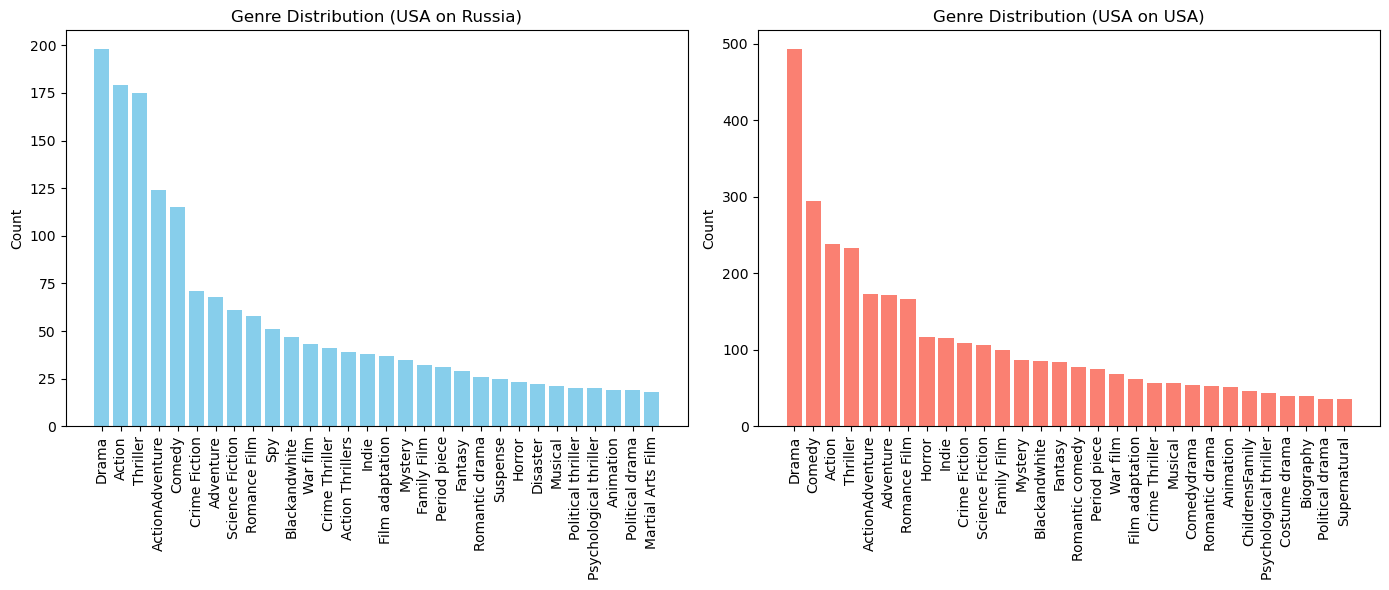

In [29]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for USA and Russia
axes[0].bar(genres_count_us_on_russia_reduced.keys(), genres_count_us_on_russia_reduced.values(), color='skyblue')
axes[0].set_title('Genre Distribution (USA on Russia)')
axes[0].set_xticklabels(genres_count_us_on_russia_reduced.keys(), rotation=90)
axes[0].set_ylabel('Count')

# Plot for Rest of the World
axes[1].bar(genres_count_us_on_us_reduced.keys(), genres_count_us_on_us_reduced.values(), color='salmon')
axes[1].set_title('Genre Distribution (USA on USA)')
axes[1].set_xticklabels(genres_count_us_on_us_reduced.keys(), rotation=90)
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [30]:
set(genres_count_us_on_russia_reduced.keys()) - set(genres_count_us_on_us_reduced.keys())

{'Action Thrillers',
 'Disaster',
 'Martial Arts Film',
 'Political thriller',
 'Spy',
 'Suspense'}

In [31]:
set(genres_count_us_on_us_reduced.keys()) - set(genres_count_us_on_russia_reduced.keys())

{'Biography',
 'ChildrensFamily',
 'Comedydrama',
 'Costume drama',
 'Romantic comedy',
 'Supernatural'}

We can see that, other than the first few common genres, there are some strong differences between the two subsets:
- Movies talking about Russia are often movies with tags such as 'Spy', 'Disaster' and 'Political Thriller', and often associated with a general feeling of suspence
- Biographical Movies are more common when talking about the USA, showing that production in the USA is more inclined to talking about people from the USA themselves
- There are much more movies talking about USA than Russia